___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

# Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [16]:
from sklearn.neighbors import BallTree
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz  pyclustertend'ın hopkins kütüphanesinde var.Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız . Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

#### Load Dataset

In [17]:
df0 = pd.read_csv("Mall_Customers.csv")
df = df0.copy()

#### Explore Data

You can rename columns to more usable, if you need.

In [18]:
df.sample(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
61,62,Male,19,46,55
60,61,Male,70,46,56
28,29,Female,40,29,31
117,118,Female,49,65,59
51,52,Male,33,42,60
121,122,Female,38,67,40


In [19]:
df.rename(columns={'Gender':'gender', 'Age':'age', 'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score'}, inplace=True)

In [20]:
df.columns

Index(['CustomerID', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

---
---

#### 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [23]:
df.drop('CustomerID', axis=1, inplace=True)

In [24]:
df.gender = df.gender.apply(lambda x: 1 if x=='Female' else 0)

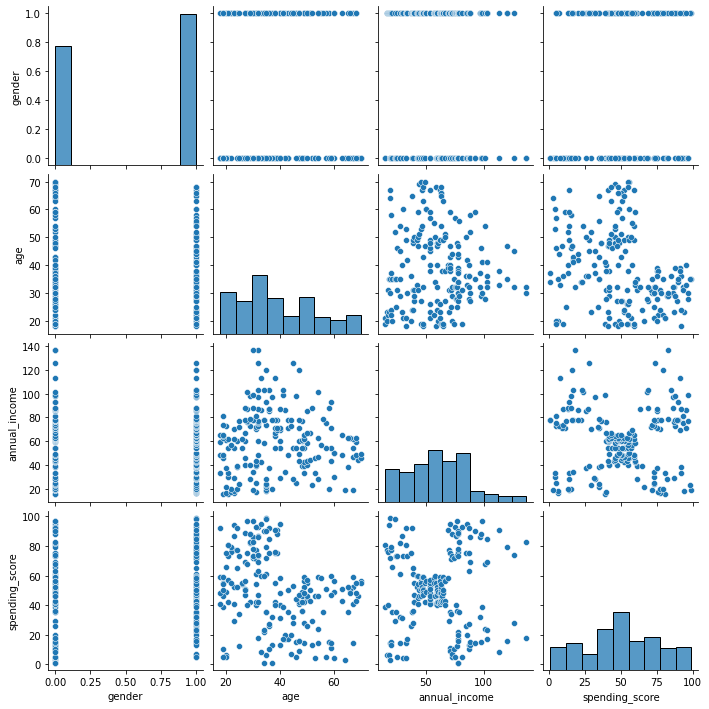

In [25]:
sns.pairplot(df)
plt.show()
# Annual_income ve Spending_score arasında uygun bir kümeleme oluşturulabilir.
# Clustering Tenddincy looking HIGH!!

<AxesSubplot:>

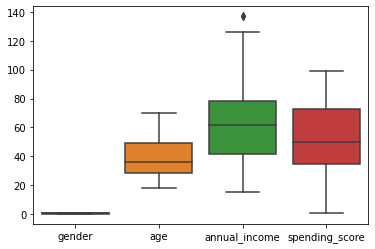

In [26]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='annual_income', ylabel='Density'>

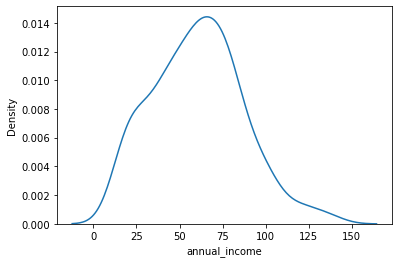

In [27]:
sns.kdeplot(df.annual_income)

In [28]:
df.annual_income.sort_values().tail(10)

190    103
191    103
192    113
193    113
194    120
195    120
196    126
197    126
198    137
199    137
Name: annual_income, dtype: int64

---
---

# Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## Clustering based on Age and Spending Score

### Create a new dataset with two variables of your choice

In [29]:
X_age_spend = df.drop(['gender', 'annual_income'], axis=1)

In [30]:
X_age_spend.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


### Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df1 = X_age_spend.copy()
df2 = X_age_spend.copy()
scale_minmax = hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])
scale_stand = hopkins(StandardScaler().fit_transform(df2), df2.shape[0])
print(f"MinMaxScaler() Hopkins: {scale_minmax}\nStandartScaler() Hopkins: {scale_stand}")

# Age ve spending_score datamız için scale işlemlerinden sonraki yaptığımız hopkins testinde çok bir fark oluşmadı, o yüzden StandartScaler()'ı tercih ettik.

MinMaxScaler() Hopkins: 0.3240482054445271
StandartScaler() Hopkins: 0.31253168162022377


In [32]:
scaler = StandardScaler()
scaler.fit(X_age_spend)
X_age_spend_scaled = scaler.transform(X_age_spend)

### Determine optimal number of clusters

In [33]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [34]:
K_means_model.fit(X_age_spend_scaled)

KMeans(n_clusters=5, random_state=42)

In [35]:
K_means_model.predict(X_age_spend_scaled)

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [36]:
K_means_model.labels_

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

### Elbow Method

In [37]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X_age_spend_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

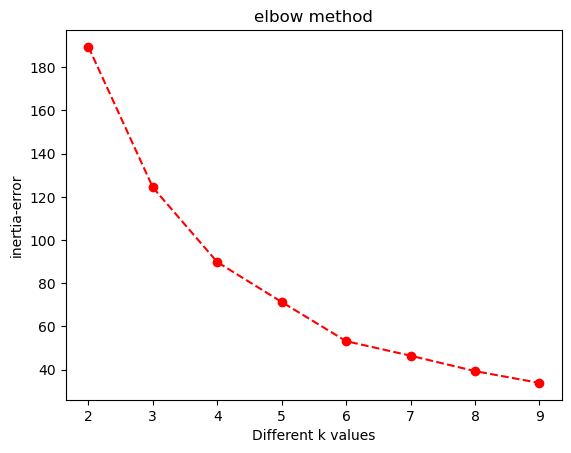

In [38]:
plt.style.use('default')
plt.plot(K, ssd, "bo--", color= 'red')
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
# 3 keskin düşüşün başladığı ilk nokta gibi duruyor. Emin olmak için diğer metrikleri kontrol edicez.

In [39]:
ssd # sum of squared distance

[189.38749033992428,
 124.32628617921526,
 89.76521676586151,
 71.2955659221944,
 53.17373745380917,
 46.44628500949162,
 39.305873251926876,
 33.83644725407147]

In [40]:
-pd.Series(ssd).diff()

0          NaN
1    65.061204
2    34.561069
3    18.469651
4    18.121828
5     6.727452
6     7.140412
7     5.469426
dtype: float64

In [41]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,65.061204
3,34.561069
4,18.469651
5,18.121828
6,6.727452
7,7.140412
8,5.469426


<AxesSubplot:>

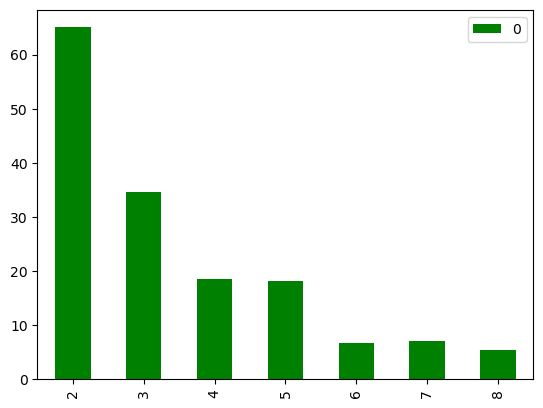

In [42]:
df_diff[1:].plot(kind='bar', color= 'green')
# 3 optimal K değeri gibi gözüküyor.

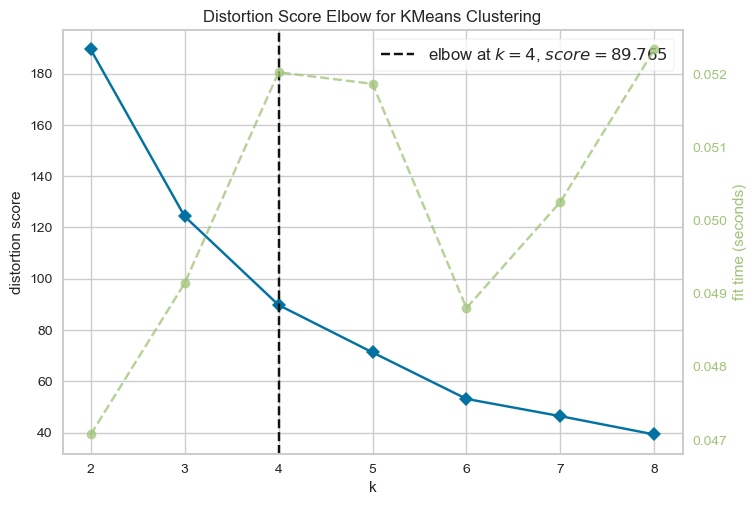

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_age_spend_scaled)       
visualizer.poof();
# Yellowbrick K değerini 4 tavsiye ediyor, emin olmak için silhouette analiz yapıcaz.

### Silhouette analysis

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
K_means_model.labels_

array([4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 1, 0,
       2, 0, 1, 4, 4, 4, 1, 0, 4, 3, 1, 1, 1, 3, 4, 1, 3, 4, 3, 1, 3, 4,
       1, 3, 4, 4, 3, 1, 3, 3, 3, 4, 1, 1, 4, 1, 3, 1, 3, 1, 4, 1, 1, 4,
       0, 1, 3, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 1, 3, 4, 1, 4, 3, 1, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 1, 1, 1, 4, 1, 1, 0, 4, 0, 1, 0, 2, 0, 2, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 2, 0, 4, 0, 4, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [46]:
silhouette_score(X_age_spend_scaled, K_means_model.labels_)
# 5 küme için silhouette score 0.44. 

0.44754858878462783

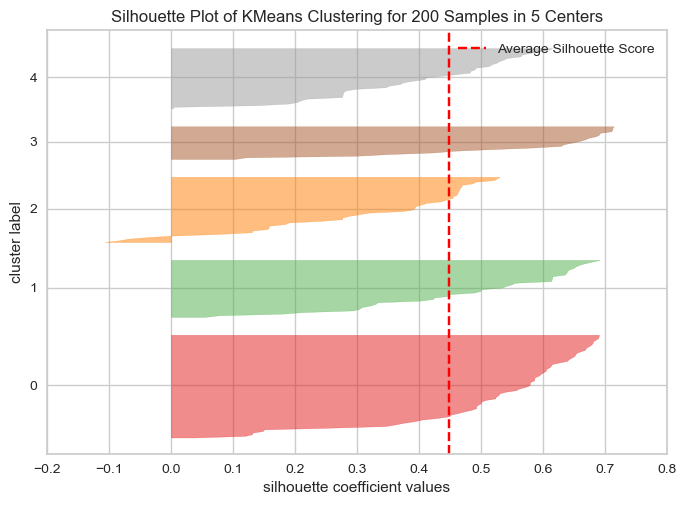

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_age_spend_scaled)    
visualizer.poof();
# Aşağıda görünüdğü gibi 2 numaralı cluster için bazı s_scorlarımız negatif çıktı

### Why silhouette_score is negative?

![image.png](attachment:image.png)

###  Apply K Means

In [48]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X_age_spend_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_age_spend_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# Yukarda yaptığımız değerlendirmeler sonucunda da n_cluster için 3'un daha uygun olduğuna karar verdik.

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.44754858878462783
For n_clusters=6, the silhouette score is 0.4531637132837109
For n_clusters=7, the silhouette score is 0.40053964470007974
For n_clusters=8, the silhouette score is 0.41387412992354433


### Visualizing and Labeling All the Clusters

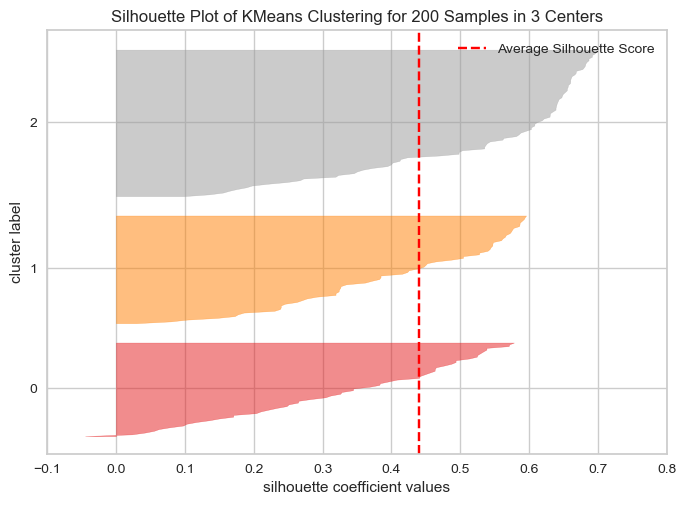

In [49]:
# S-score = 3 optimal gibi, bu yüzden 3 küme ile görselleştireceğiz.
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_k_age = KMeans(n_clusters=3, 
                random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model_k_age)

visualizer.fit(X_age_spend_scaled)    
visualizer.poof();

In [50]:
model_k_age.labels_
# 3 cluster ile modelin labelleri.

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [51]:
visualizer.silhouette_samples_
# Gözlemlerin ayrı ayrı silhouette score'larını da görebiliriz.

array([ 0.09770372,  0.63816353,  0.46260238,  0.65580727,  0.32758908,
        0.64036618,  0.51282749,  0.62979626,  0.26981211,  0.65910417,
        0.38415244,  0.58073905,  0.3187871 ,  0.66569085,  0.52373206,
        0.64883863,  0.49306343,  0.53451729,  0.32370751,  0.58723416,
        0.49306343,  0.6544889 ,  0.24776118,  0.66154791,  0.18562429,
        0.69748633,  0.05512866,  0.39935537,  0.3834007 ,  0.65469182,
        0.2300411 ,  0.61111268,  0.02983387,  0.58454179,  0.06233818,
        0.63816353,  0.40753149,  0.66760885,  0.53772784,  0.60745715,
        0.5464858 ,  0.64659516,  0.23931471,  0.46936375,  0.14732124,
        0.5626856 ,  0.44927284, -0.04467414,  0.22156794,  0.26473298,
        0.42506572,  0.41289656,  0.24825795,  0.54631346,  0.44650277,
        0.26229727,  0.48699351,  0.56109706,  0.1972674 ,  0.52690909,
        0.53931853,  0.34512986,  0.57507916,  0.50388619,  0.59342732,
        0.41160664,  0.10267786,  0.57155258,  0.42297169,  0.07

In [52]:
for i in range(3):
    label = (model_k_age.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.3291180557405056
mean silhouette score for label 1    : 0.4087540439483158
mean silhouette score for label 2    : 0.5332244555883447
mean silhouette score for all labels : 0.43952990002101927


In [53]:
model_k_age.fit_predict(X_age_spend_scaled)

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [54]:
clusters = model_k_age.labels_
clusters

array([0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [55]:
X_age_spend["predicted_clusters"] = clusters
X_age_spend.head()

,age,spending_score,predicted_clusters
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0


In [56]:
clus_pred = X_age_spend.groupby('predicted_clusters').mean().sort_values('age')
clus_pred
# Age kümelerin belirlenmesinde çok etkili değil, spending score daha etkili.
# Labelları Normal=0, Spender=1, Super Spender=2 olarak karar verdik.

,age,spending_score
predicted_clusters,,
2,28.714286,73.797619
0,34.833333,24.851852
1,56.080645,40.306452


<AxesSubplot:>

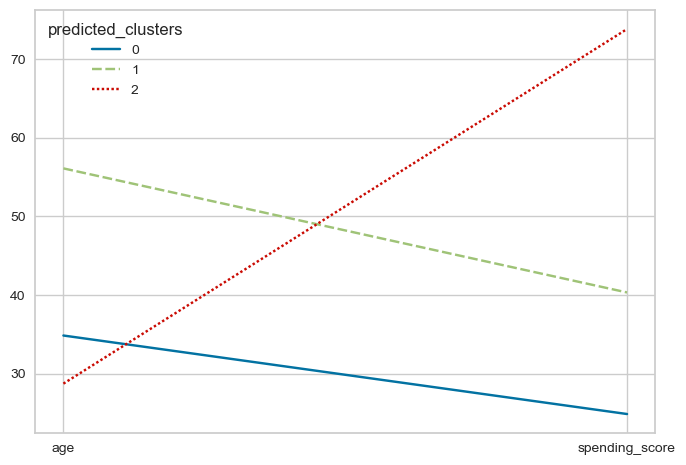

In [57]:
sns.lineplot(data= clus_pred.T)

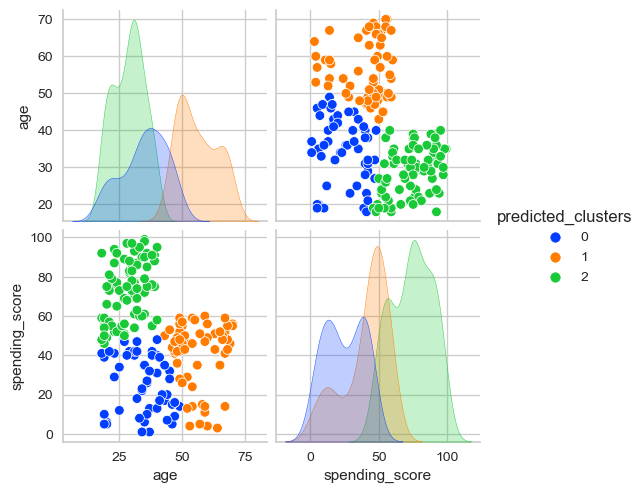

In [58]:
sns.pairplot(X_age_spend, hue='predicted_clusters', palette="bright");

age ve spending score columnleri ile incelediğimizde n_cluster = 3 için burda gördüğümüz:
- genç nüfus için harcama skoru daha yüksek
- orta yaş grubu için harcama skoru düşük
- yaşlı nüfus için ise harcama skoru orta aralıkta

## Clustering based on Annual Income and Spending Score

### Create a new dataset with two variables of your choice

In [59]:
X_income_spend = df.drop(['gender', 'age'], axis=1)
# Çalışacağımız sütunları seçtik.

In [60]:
X_income_spend.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Data Scaling

In [61]:
df1 = X_income_spend.copy()
df2 = X_income_spend.copy()
scale_minmax = hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])
scale_stand = hopkins(StandardScaler().fit_transform(df2), df2.shape[0])
print(f"MinMaxScaler() Hopkins: {scale_minmax}\nStandartScaler() Hopkins: {scale_stand}")
# annual_income ve spending_score datamız için scale işlemlerinden sonraki yaptığımız hopkins testinde çok bir fark oluşmadı, o yüzden burda da StandartScaler()'ı tercih ettik.

MinMaxScaler() Hopkins: 0.3019740367406747
StandartScaler() Hopkins: 0.30423085766575875


In [62]:
scaler = StandardScaler()
scaler.fit(X_income_spend)
X_income_spend_scaled = scaler.transform(X_income_spend)

### Determine optimal number of clusters

In [63]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [64]:
K_means_model.fit(X_income_spend_scaled)

KMeans(n_clusters=5, random_state=42)

In [65]:
K_means_model.predict(X_income_spend_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [66]:
K_means_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

### Elbow Method

In [67]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X_income_spend_scaled)
    ssd.append(model.inertia_)
# Diğer n_cluster değerleri için, 2-10 range'inde bir for döngüsü yaptık.

Text(0.5, 1.0, 'elbow method')

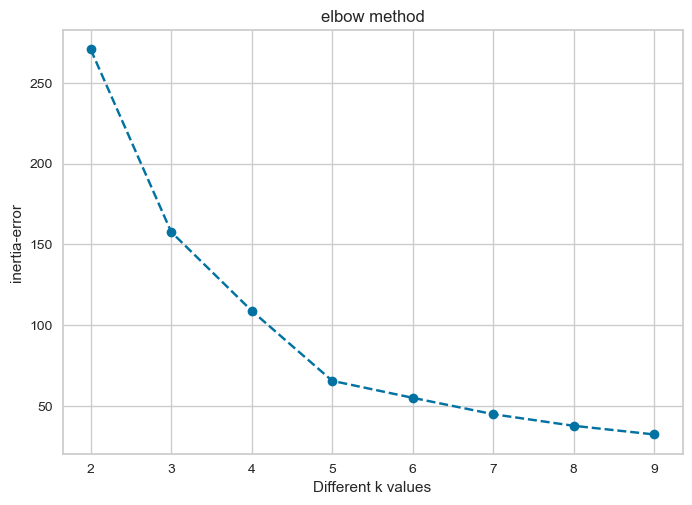

In [68]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
# 3 keskin düşüşün başladığı ilk nokta gibi duruyor. Emin olmak için diğer metrikleri kontrol edicez.

In [69]:
ssd # sum of squared distance

[270.70426664306717,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.7364034625416,
 32.37525368158286]

In [70]:
-pd.Series(ssd).diff()

0           NaN
1    113.000258
2     48.782692
3     43.352908
4     10.511060
5     10.146163
6      7.174782
7      5.361150
dtype: float64

In [71]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,113.000258
3,48.782692
4,43.352908
5,10.511060
6,10.146163
7,7.174782
8,5.361150


<AxesSubplot:>

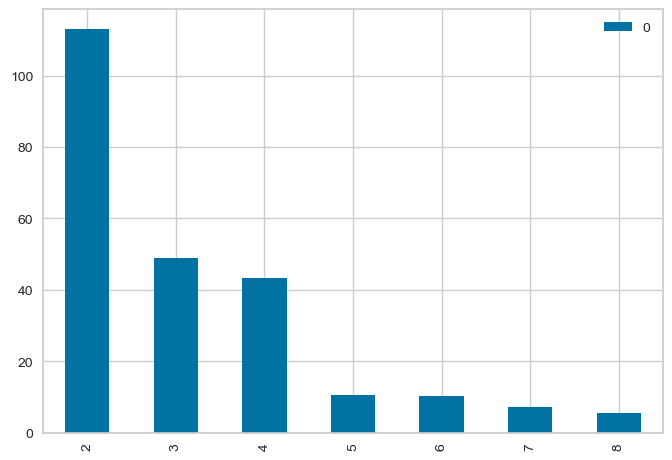

In [72]:
df_diff[1:].plot(kind='bar')
# 3 optimal K değeri gibi gözüküyor.

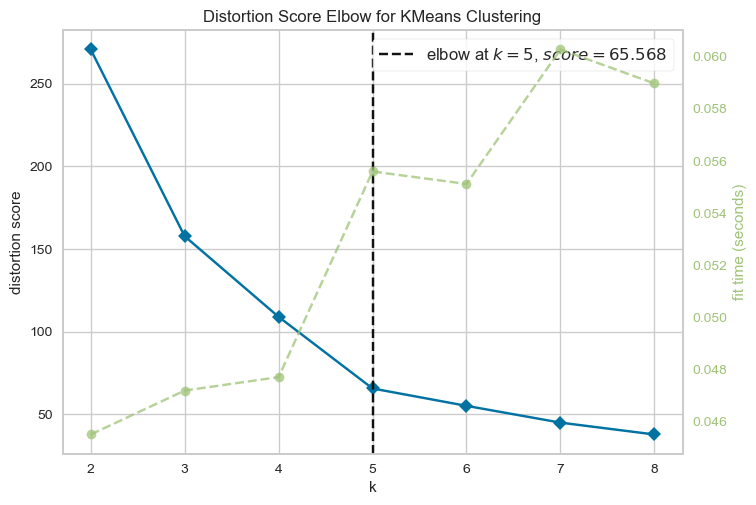

In [73]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_income_spend_scaled)       
visualizer.poof();
# Yellowbrick K değerini 4 tavsiye ediyor, emin olmak için silhouette analiz yapıcaz.

### Silhouette analysis

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
K_means_model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [76]:
silhouette_score(X_income_spend_scaled, K_means_model.labels_)
# 5 küme için silhouette score 0.55. Loop dongüsü ile farklı küme sayıları için bakalım.

0.5546571631111091

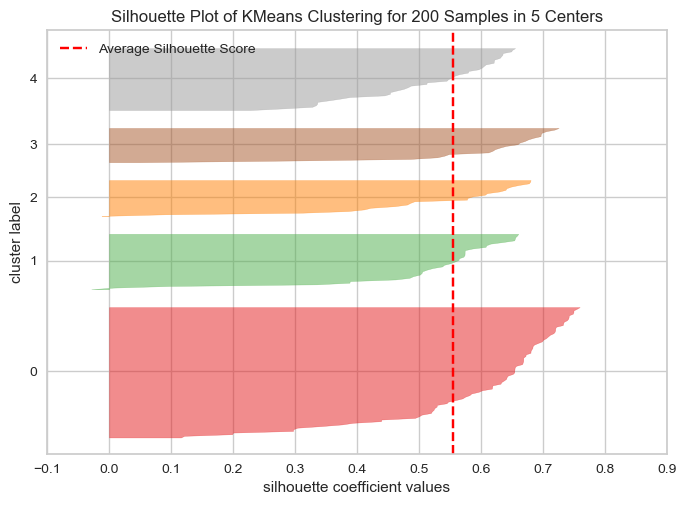

In [77]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_income_spend_scaled)    
visualizer.poof();

### Why silhouette_score is negative?

![image.png](attachment:image.png)

###  Apply K Means

In [78]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X_income_spend_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_income_spend_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# Yukarda yaptığımız değerlendirmeler sonucunda da n_cluster için 5'in daha uygun olduğuna karar verdik.

For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.4558438123118706


### Visualizing and Labeling All the Clusters

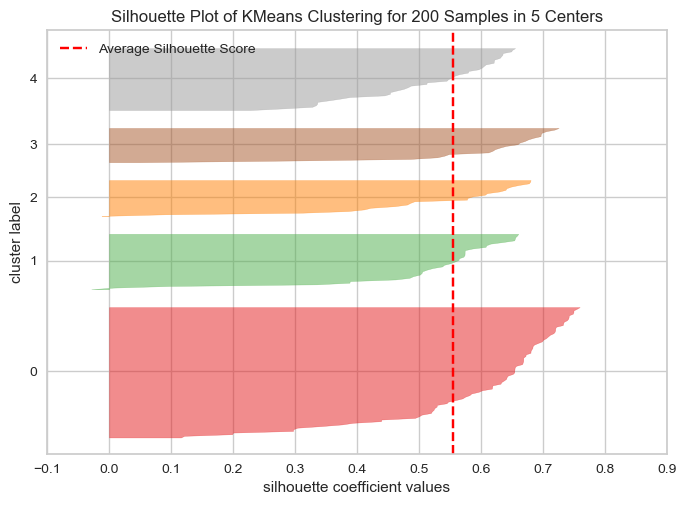

In [79]:
# S-score = 5 optimal gibi, bu yüzden 5 küme ile görselleştireceğiz.
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_k_annual = KMeans(n_clusters=5, 
                random_state=42)          # n_clusters=5'e karar verdik !
visualizer = SilhouetteVisualizer(model_k_annual)

visualizer.fit(X_income_spend_scaled)   
visualizer.poof();

In [80]:
model_k_annual.labels_
# 5 cluster ile modelin labelleri.

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [81]:
visualizer.silhouette_samples_
# Gözlemlerin ayrı ayrı silhouette score'larını da görebiliriz.

array([ 0.41124046,  0.69620683,  0.63934069,  0.69604195,  0.38563359,
        0.69748215,  0.64833998,  0.65893138,  0.62927054,  0.66184814,
        0.67709497,  0.62250892,  0.67914947,  0.7183836 ,  0.67989007,
        0.72517377,  0.480728  ,  0.54086604,  0.57771355,  0.63069704,
        0.46089203,  0.67601561,  0.64089467,  0.67033897,  0.66074953,
        0.70471845,  0.48567333,  0.29331369,  0.4925691 ,  0.6846275 ,
        0.60601978,  0.61174317,  0.57727428,  0.61836077,  0.6096252 ,
        0.64028425,  0.58637068,  0.52937454,  0.42191998,  0.48596674,
        0.09076309,  0.54813337, -0.01212476,  0.12114123,  0.3126116 ,
        0.04964594,  0.39355123,  0.43860327,  0.29680812,  0.29680812,
        0.52456542,  0.3036705 ,  0.51899981,  0.34289529,  0.49331338,
        0.37566018,  0.60191899,  0.54434561,  0.64121219,  0.59585853,
        0.55956233,  0.58127935,  0.65113096,  0.50415135,  0.6798204 ,
        0.52847598,  0.6854379 ,  0.66721797,  0.52847598,  0.65

In [82]:
for i in range(5):
    label = (model_k_annual.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")
# Her label'ımız için s_scoreların birbirine yakın olduğunu görüyoruz.

mean silhouette score for label 0    : 0.5978670176450109
mean silhouette score for label 1    : 0.5052153922125491
mean silhouette score for label 2    : 0.5105060797073505
mean silhouette score for label 3    : 0.5982119461245773
mean silhouette score for label 4    : 0.5107528927571015
mean silhouette score for all labels : 0.5546571631111091


In [83]:
model_k_annual.fit_predict(X_income_spend_scaled)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [84]:
clusters = model_k_annual.labels_
model_k_annual.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [85]:
X_income_spend["predicted_clusters"] = clusters
X_income_spend.head()

,annual_income,spending_score,predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [86]:
clus_pred = X_income_spend.groupby('predicted_clusters').mean()
clus_pred

,annual_income,spending_score
predicted_clusters,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


<AxesSubplot:>

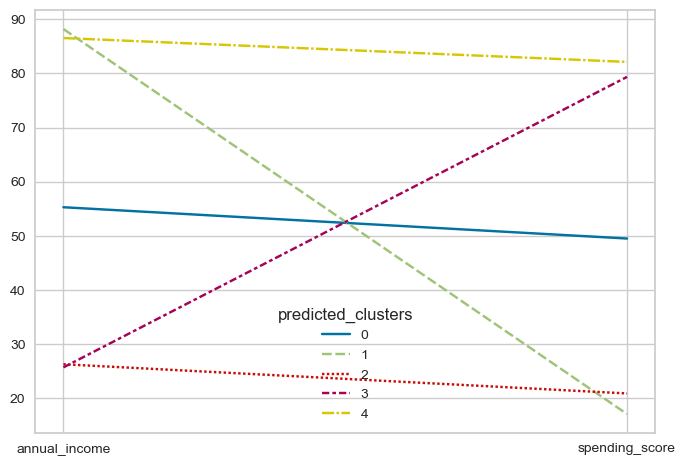

In [87]:
sns.lineplot(data= clus_pred.T)

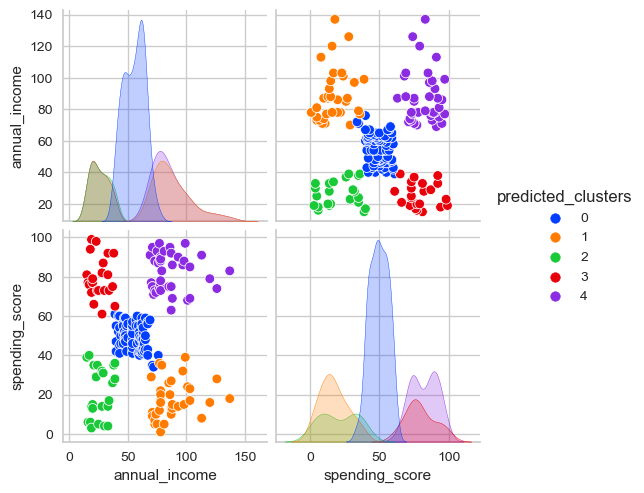

In [88]:
sns.pairplot(X_income_spend, hue='predicted_clusters', palette="bright");

income ve spend score ile yaptığımız clustering'de, n_cluster için 5 seçilince:
- düşük gelir yüksek harcama
- düşük gelir düşük harcama
- orta gelir orta harcama
- yüksek gelir yüksek harcama
- yüksek gelir düşük harcama, şeklinde labellama yaptık.

# Hierarchical Clustering

## Determine optimal number of clusters using Dendogram

### Clustering based on Age and Spending Score- x1

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [90]:
X_hier_age = df.drop(['gender', 'annual_income'], axis=1)
# Üzerinde çalışacağımız featureları belirledik.

In [91]:
X_hier_age.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [92]:
scaler = StandardScaler()
scaler.fit(X_hier_age)
X_shier_age = scaler.transform(X_hier_age)
# K-means ile çalışırken kullandığımız gibi, burada da StandartScaler() ile devam ediyoruz.

In [93]:
hc_ward = linkage(y = X_shier_age, method = "ward")
hc_complete = linkage(X_shier_age, "complete")
hc_average = linkage(X_shier_age, "average")
hc_single = linkage(X_shier_age, "single")

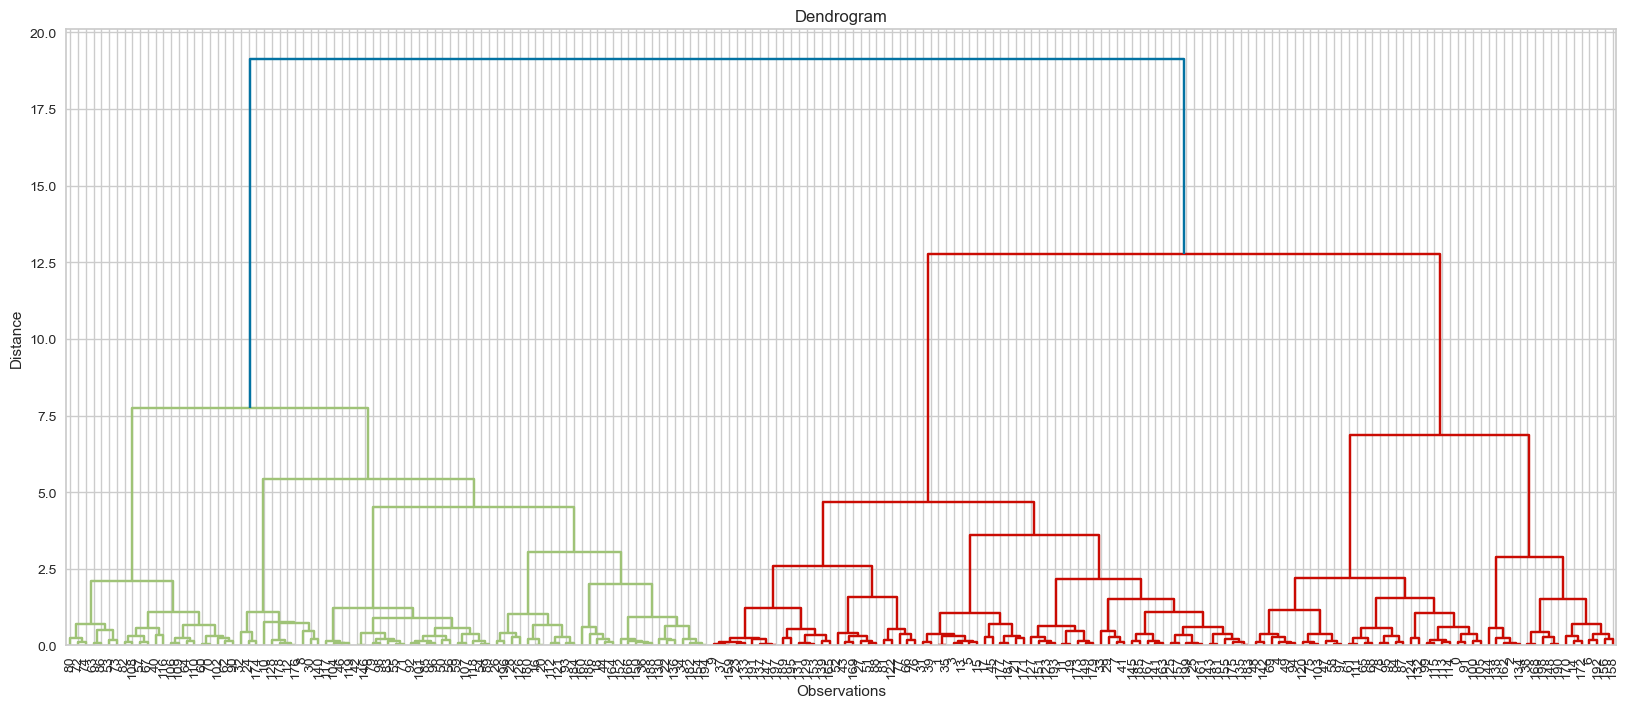

In [94]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);
# Ward ile dendogramı incelediğimizde 3 cluster için uygun gibi gözüküyor.
# Aşağıda diğer method'lar için de bir inceleyelim.

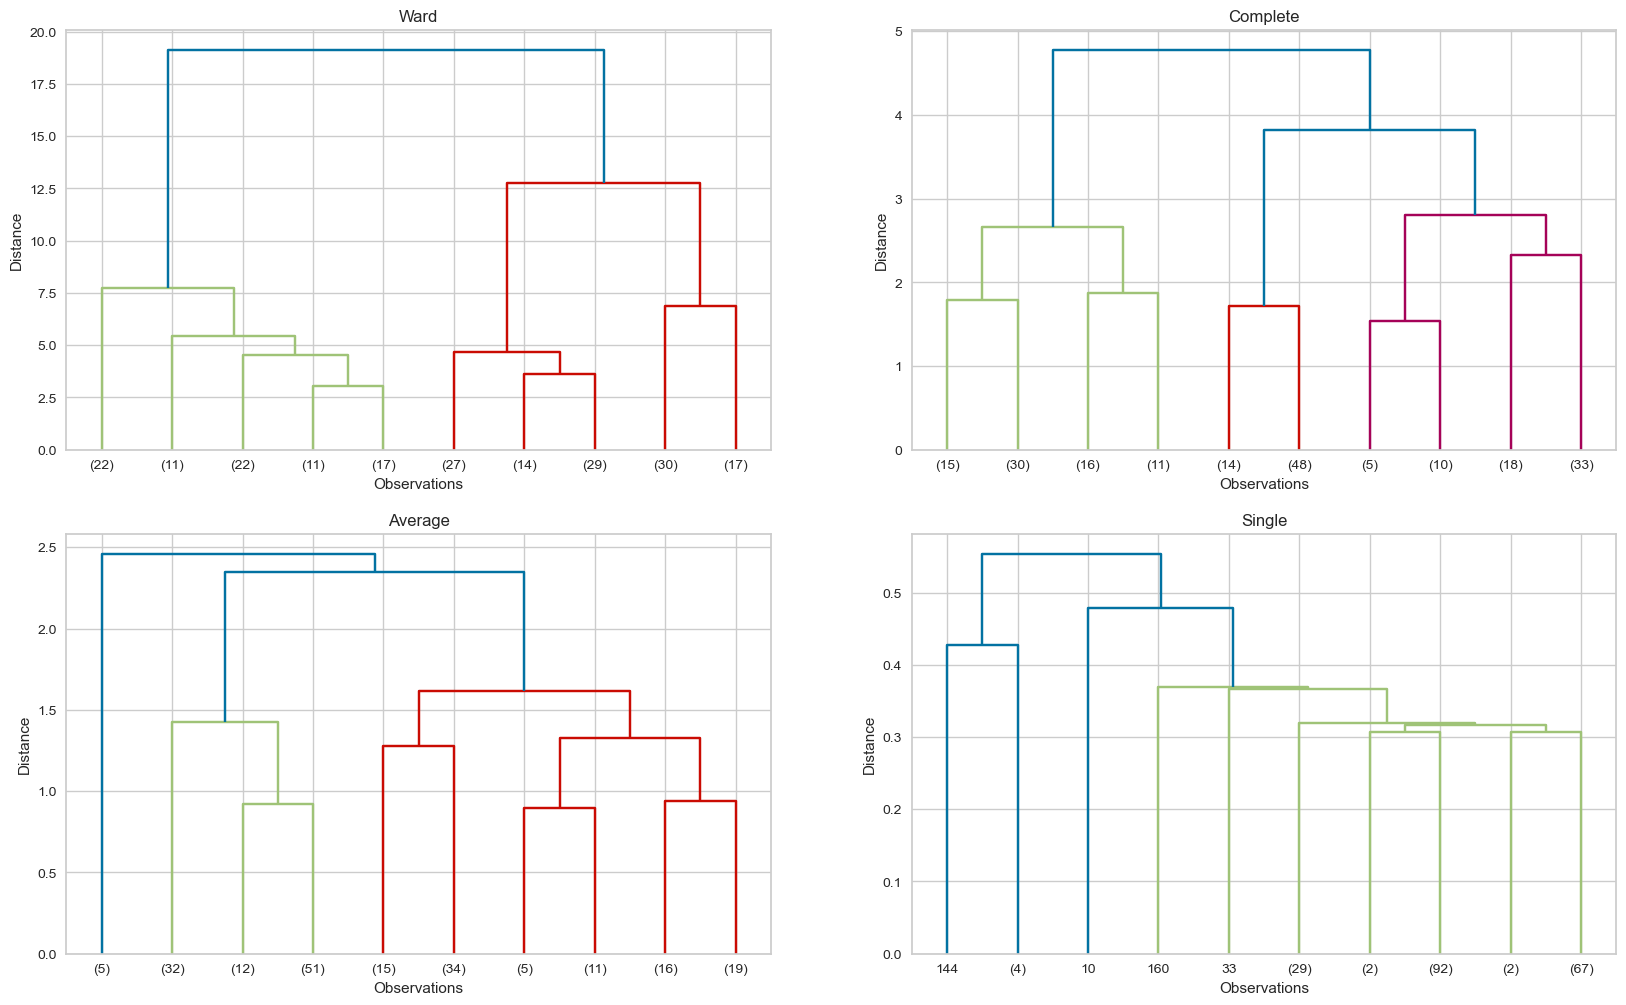

In [95]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10); 
# Dendograma göre 2 cluster tercih edilebilir diyor fakat 3 de olabileciğinden silht scorlarına bakacağız.

A dendrogram is a tree-like diagram that shows the hierarchical relationships between clusters. The height of each branch in the dendrogram represents the distance between the clusters that are being merged. The length of each branch can be used to estimate the intra-cluster distance.

To measure the intra-cluster distance using a dendrogram, you can simply find the height of the branch that corresponds to the desired cluster. The height of the branch represents the distance between the clusters that were merged to form that cluster. The lower the height of the branch, the more similar the objects in the cluster are to each other.

The silhouette score is a measure of how well an object fits into its assigned cluster compared to other clusters. The silhouette score ranges from -1 to 1, with a score of 1 indicating that the object is well-matched to its cluster and poorly matched to other clusters, and a score of -1 indicating the opposite.

To calculate the silhouette score for a particular object, you can first calculate the average distance between the object and all other objects in its cluster (intra-cluster distance). Then, you can calculate the average distance between the object and all objects in the nearest neighboring cluster (inter-cluster distance). Finally, you can subtract the inter-cluster distance from the intra-cluster distance and divide by the maximum of the two distances. This gives you the silhouette score for the object.

### Clustering based on Annual Income and Spending Score- x2

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [97]:
X_hier_annual = df.drop(['gender', 'age'], axis=1)

In [98]:
X_hier_annual.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [99]:
scaler = StandardScaler()
scaler.fit(X_hier_annual)
X_shier_annual = scaler.transform(X_hier_annual)
# K-means ile çalışırken kullandığımız gibi, burada da StandartScaler() ile devam ediyoruz.

In [100]:
hc_ward = linkage(y = X_shier_annual, method = "ward")
hc_complete = linkage(X_shier_annual, "complete")
hc_average = linkage(X_shier_annual, "average")
hc_single = linkage(X_shier_annual, "single")

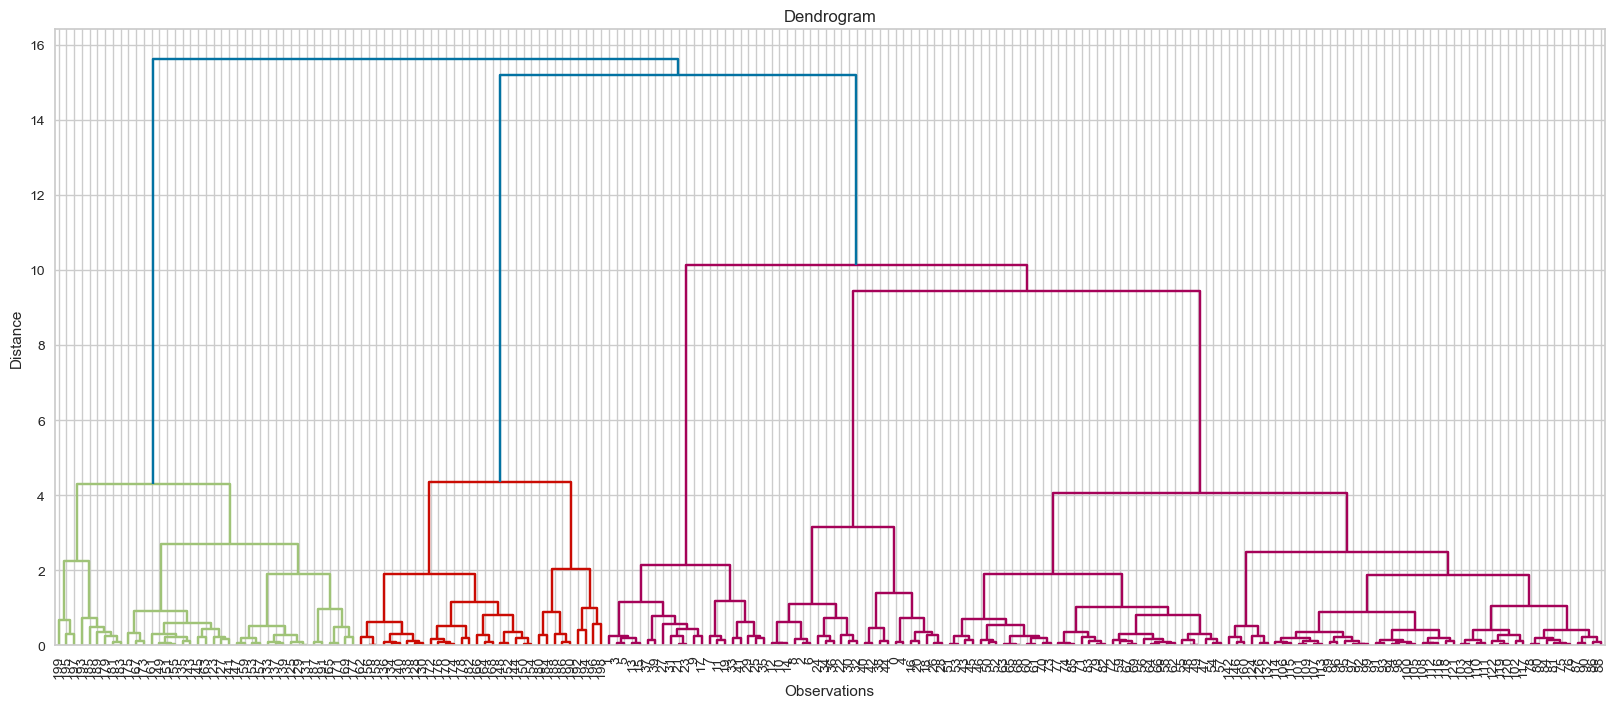

In [101]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);
# annual_income ve spending score column'larımız için ward methodu ile 5 cluster uygun gibi.
# Yine de aşağıda diğer methodlar için inceleyeceğiz.

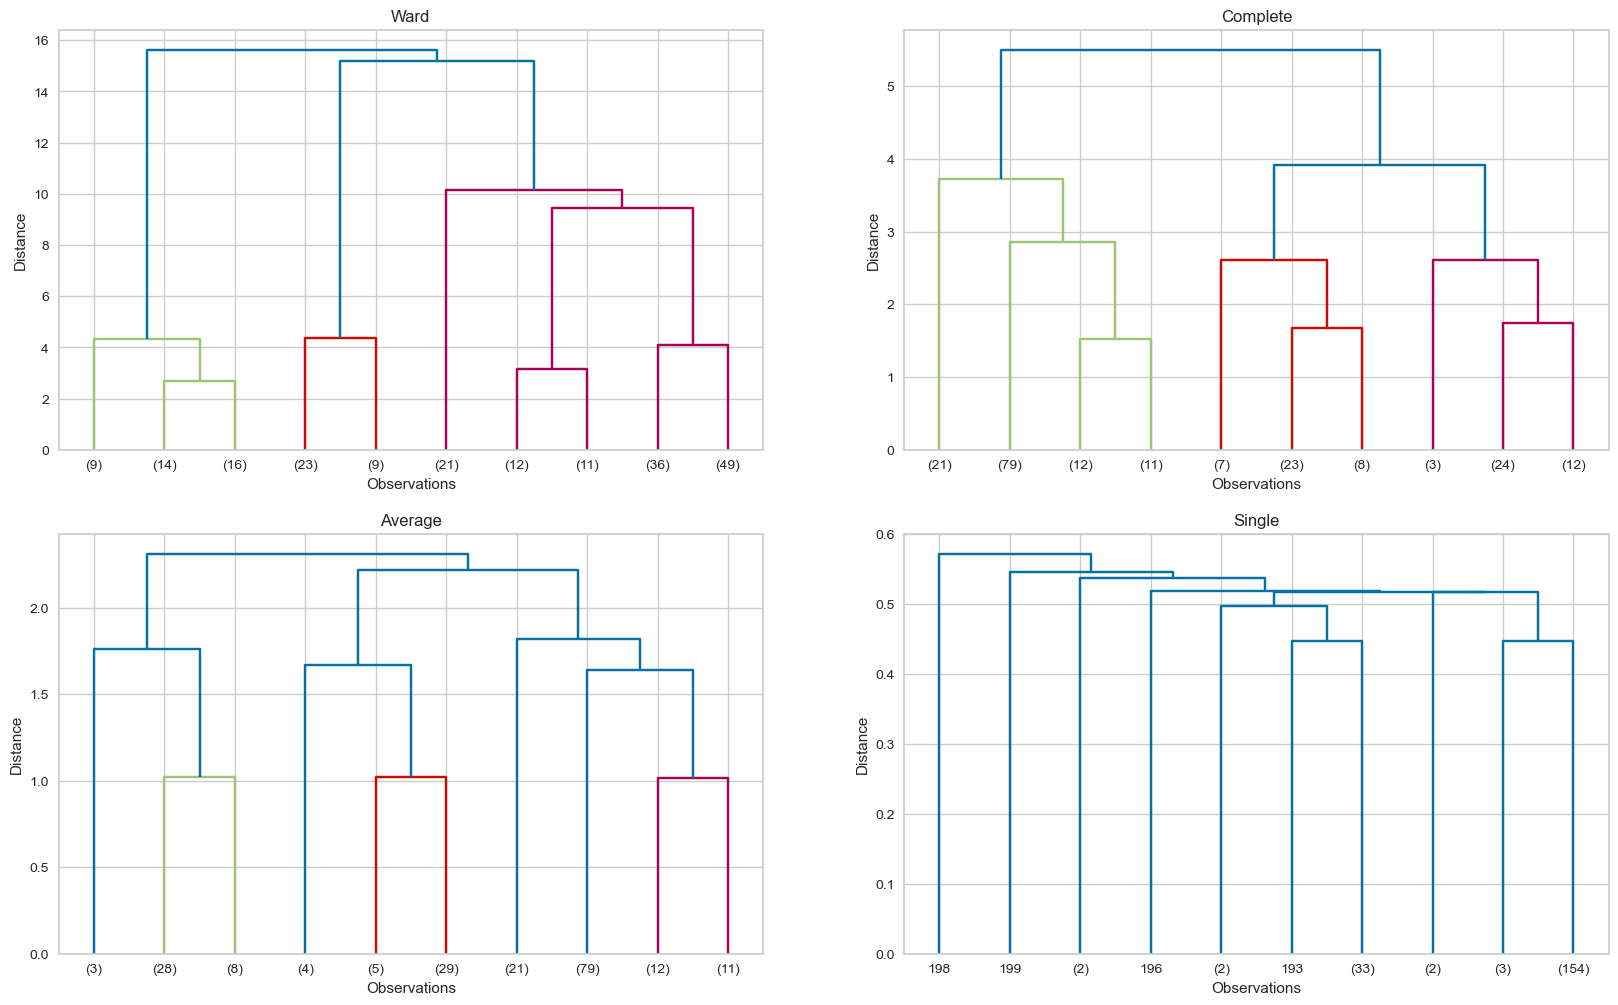

In [102]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10); 
# Dendograma göre 3 kümeuygun gibi fakat kümeler içi mesafeyi de minimum tutmak istediğimizden kümeler arası mesafe'den düşüp, n_cluster 5 daha iyi olur diye düşünüyoruz.

## Apply Agglomerative Clustering

### Age and Spending Score- x1

In [103]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Dendogramları incelerken kullandığımız scale edilmiş datamız(X_shier_age) ile devam ediyoruz.

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X_shier_age)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_shier_age, model.labels_)}')
# Seçecğimiz cluster için s_score'a göre de 3 iyi gibi duruyor.

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


In [104]:
model_h_age = AgglomerativeClustering(n_clusters=3,
                                affinity="euclidean",
                                linkage="ward")
clusters = model_h_age.fit_predict(X_shier_age)

# 3 clustera göre scatter plot üzerinden iyi bir ayrım yapıp yapamadığımızı gözlemleyeceğiz.

In [105]:
X_hier_age["predicted_clusters"] = clusters
X_hier_age.head()

,age,spending_score,predicted_clusters
0,19,39,1
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,1


### Annual Income and Spending Score- x2

In [106]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Dendogramları incelerken kullandığımız scale edilmiş datamız(X_shier_annual) ile devam ediyoruz.

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X_shier_annual)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_shier_annual, model.labels_)}')
# Seçecğimiz cluster için s_score'a göre de 5 iyi gibi duruyor.

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


In [107]:
model_h_annual = AgglomerativeClustering(n_clusters=5,
                                affinity="euclidean",
                                linkage="ward")
clusters = model_h_annual.fit_predict(X_shier_annual)

# 5 clustera göre scatter plot üzerinden iyi bir ayrım yapıp yapamadığımızı gözlemleyeceğiz.

In [108]:
X_hier_annual["predicted_clusters"] = clusters
X_hier_annual.head()
# Yaptığımız predictleri datamıza ekledik.

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


## iii. *Visualizing and Labeling All the Clusters* 

### Age and Spending Score- x1

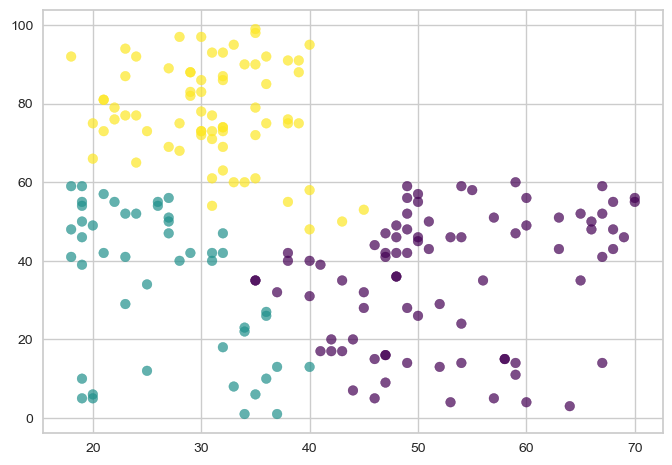

In [109]:
plt.scatter(X_hier_age["age"], 
            X_hier_age["spending_score"],
            c=model_h_age.labels_,
            cmap="viridis",
            alpha=0.7);

<Figure size 2000x1000 with 0 Axes>

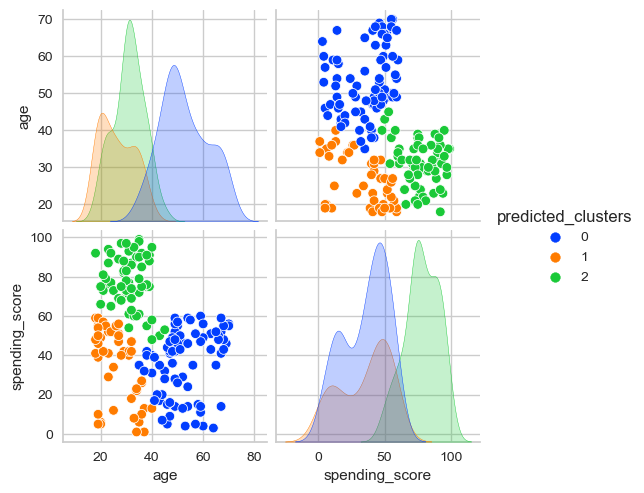

In [110]:
plt.figure(figsize=(20,10))
sns.pairplot(X_hier_age, hue="predicted_clusters", palette="bright");

In [111]:
clus_pred = X_hier_age.groupby("predicted_clusters").mean()
clus_pred
# her cluster için her featuran ortalama değerlerini alıp bu değerler üzerinden featurların birbirleriyle girift(iç içeler mi?) olup olmadığını tespit etmeye çalışacağız.

,age,spending_score
predicted_clusters,,
0,52.578313,35.638554
1,26.382979,34.765957
2,30.942857,77.828571


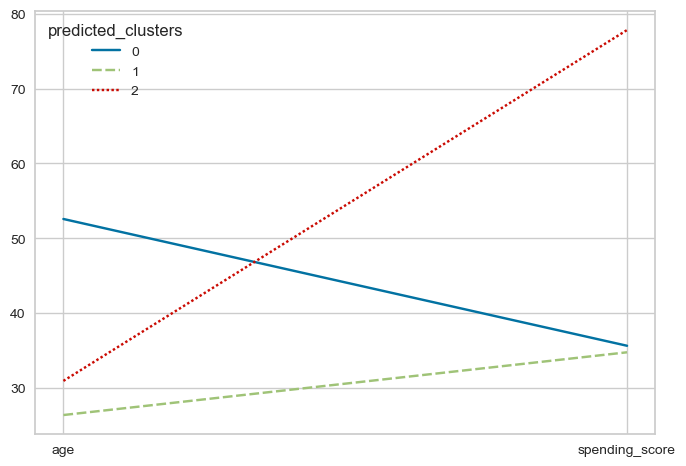

In [112]:
sns.lineplot(data=clus_pred.T);
# en iyi ayrışımın olduğu ve hangi featurelarda datam giriftleşiyor onu görmek için çiziyoruz bu lineplot'u.

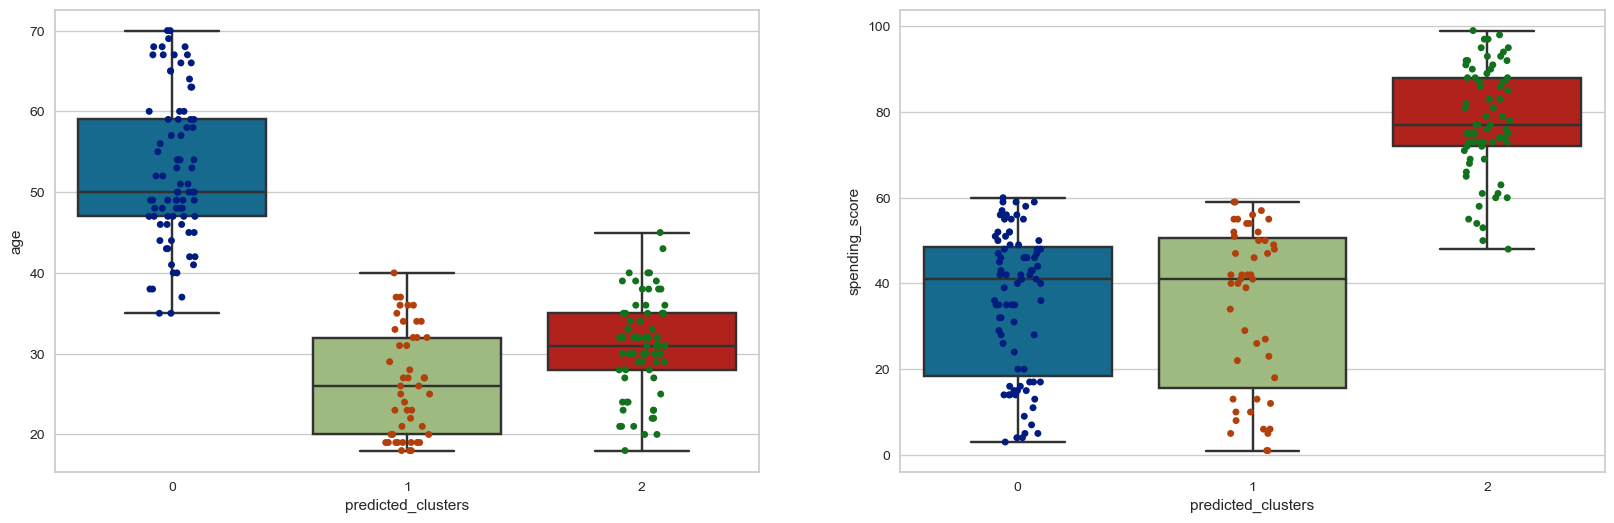

In [113]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y="age", x="predicted_clusters", data=X_hier_age)
sns.stripplot(y="age", x="predicted_clusters", data=X_hier_age, palette="dark")

plt.subplot(122)
sns.boxplot(y="spending_score", x="predicted_clusters", data=X_hier_age)
sns.stripplot(y="spending_score", x="predicted_clusters", data=X_hier_age, palette="dark");


# clusterların birbiriylr grift olup olmadıklarını daha net görebilmek için ayrıca boxplot ve strip plot üzerinden
# clusterları her feature özelindeki dağılımı kontrol ediyoruz.

### Annual Income and Spending Score- x2

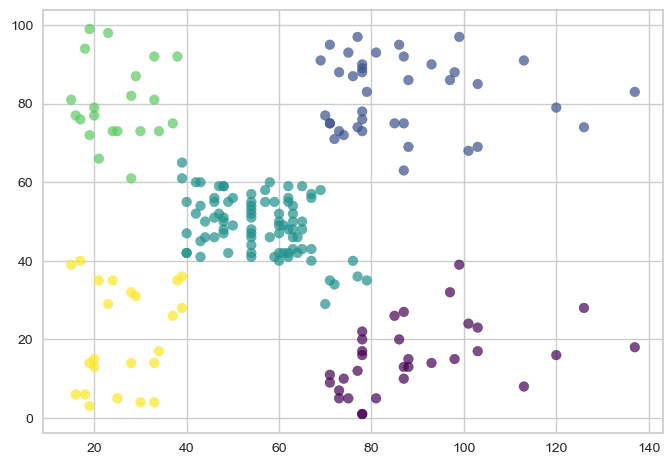

In [114]:
plt.scatter(X_hier_annual["annual_income"], 
            X_hier_annual["spending_score"],
            c=model_h_annual.labels_,
            cmap="viridis",
            alpha=0.7);

<Figure size 2000x1000 with 0 Axes>

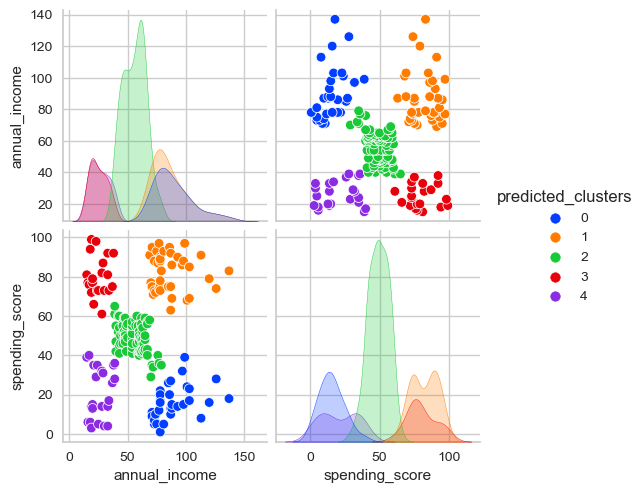

In [115]:
plt.figure(figsize=(20,10))
sns.pairplot(X_hier_annual, hue="predicted_clusters", palette="bright");

In [116]:
clus_pred = X_hier_annual.groupby("predicted_clusters").mean()
clus_pred
# her cluster için her featuran ortalama değerlerini alıp bu değerler üzerinden featurların birbirleriyle girift(iç içeler mi?) olup olmadığını tespit etmeye çalışacağız.

,annual_income,spending_score
predicted_clusters,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


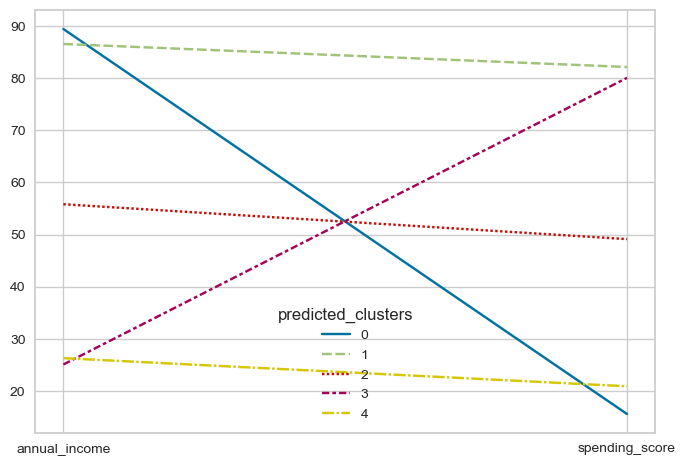

In [117]:
sns.lineplot(data=clus_pred.T);
# en iyi ayrışımın olduğu ve hangi featurelarda datam giriftleşiyor onu görmek için lineplot'u çiziyoruz.

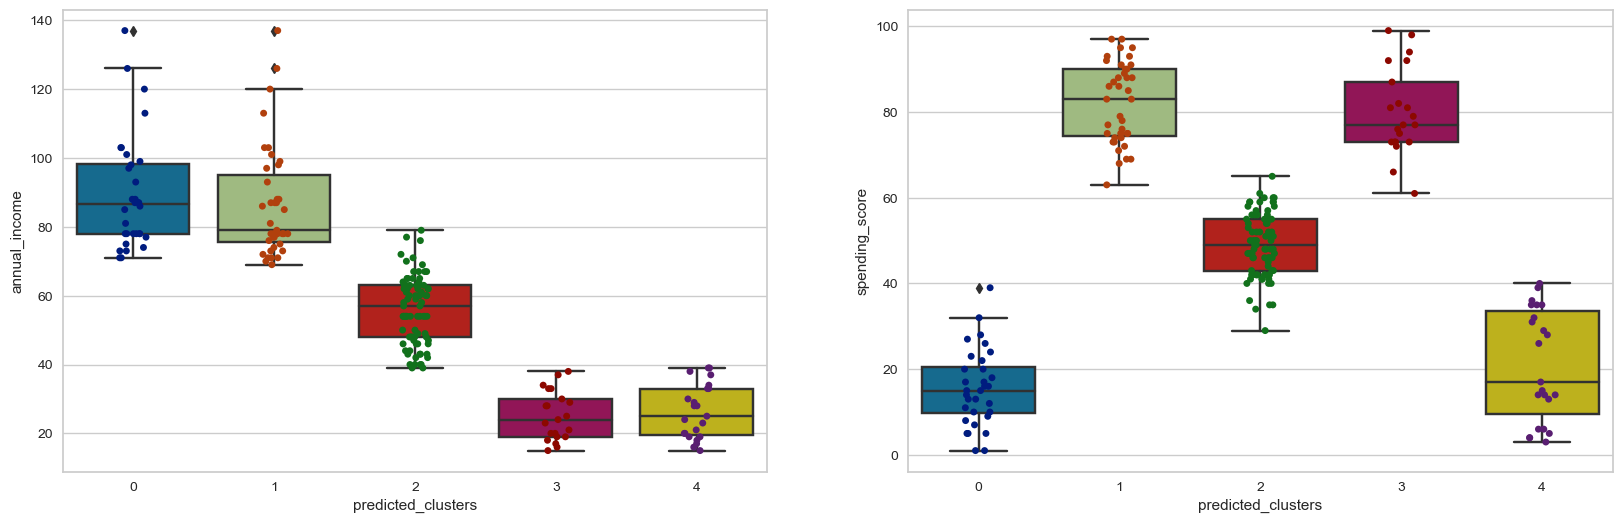

In [118]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y="annual_income", x="predicted_clusters", data=X_hier_annual)
sns.stripplot(y="annual_income", x="predicted_clusters", data=X_hier_annual, palette="dark")

plt.subplot(122)
sns.boxplot(y="spending_score", x="predicted_clusters", data=X_hier_annual)
sns.stripplot(y="spending_score", x="predicted_clusters", data=X_hier_annual, palette="dark");


# clusterların birbiriylr grift olup olmadıklarını daha net görebilmek için ayrıca boxplot ve strip plot üzerinden
# clusterları her feature özelindeki dağılımı kontrol ediyoruz.

## LAST STEP

In [119]:
X = df[['age', 'annual_income', 'spending_score']]

X['k_mean_age'] = X_age_spend.predicted_clusters
X['k_mean_annual'] = X_age_spend.predicted_clusters
X['hier_age'] = X_hier_age.predicted_clusters
X['hier_annual'] = X_hier_annual.predicted_clusters
X.head()

,age,annual_income,spending_score,k_mean_age,k_mean_annual,hier_age,hier_annual
0,19,15,39,0,0,1,4
1,21,15,81,2,2,2,3
2,20,16,6,0,0,1,4
3,23,16,77,2,2,2,3
4,31,17,40,0,0,1,4


### Interpretation based on Age and Spending Score- x1

In [120]:
X_age_spend.head()
# age ve spend için label işlemine k_mean ile devam etmeye karar verdik

,age,spending_score,predicted_clusters
0,19,39,0
1,21,81,2
2,20,6,0
3,23,77,2
4,31,40,0


In [121]:
X_age_spend.groupby('predicted_clusters').mean()

,age,spending_score
predicted_clusters,,
0,34.833333,24.851852
1,56.080645,40.306452
2,28.714286,73.797619


Based on the average age and spending score of the customers in each cluster, the clusters can be labeled as follows:

Cluster 0: Young customers with low spending scores - These customers have a relatively low average age and low average spending score, indicating that they are either just starting out in their careers or are budget-conscious. They can be labeled as "Entry-Level Customers" or "Budget Shoppers".

Cluster 1: Middle-aged customers with moderate spending scores - These customers have a relatively high average age and moderate average spending score, indicating that they are established in their careers and have a comfortable income. They can be labeled as "Mid-Level Customers" or "Comfortable Spenders".

Cluster 2: Young customers with high spending scores - These customers have a relatively low average age and high average spending score, indicating that they are either high-earning professionals or are willing to splurge on luxury items. They can be labeled as "High-End Customers" or "Luxury Shoppers".

In [122]:
X_age_spend['customer_category'] = X_age_spend['predicted_clusters'].apply(lambda x: 'young_budget_spenders' if x==0 else ('comfortable_spenders' if x==1 else 'young_high_end_customers'))
X_age_spend.head()

,age,spending_score,predicted_clusters,customer_category
0,19,39,0,young_budget_spenders
1,21,81,2,young_high_end_customers
2,20,6,0,young_budget_spenders
3,23,77,2,young_high_end_customers
4,31,40,0,young_budget_spenders


#### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

### Interpretation based on Annual Income and Spending Score- x2

In [123]:
X_hier_annual.head()
# annual_income ve spend için label işlemine hierarchical ile devam etmeye karar verdik

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [124]:
X_hier_annual.groupby('predicted_clusters').mean()

,annual_income,spending_score
predicted_clusters,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


As seen , both in K Means algotihm and agglomerative hierarchical algorithm, the models with 5 clusters performed better in terms of maximum inter cluster distance and minimum intracluster distance measures. When we check the related scatter plots and boxplots, we can see that the clusters are better separated according to the annual income and spending scores of the customers.

Based on this result, when we do a research fort he customer segmentation in the real world practices, we can label our 5 clusters as follow: 

1. Cluster 1: High-income, low-spending customers - These customers have high annual incomes but tend to spend less at the mall. They are often labeled as "Savers" or “**Careful Spenders**" in customer segmentation.
2. Cluster 2: High-income, high-spending customers - These customers have both high annual incomes and high spending scores at the mall. They are typically labeled as "**High-End Customers**" or "**Big Spenders**".
3. Cluster 3: Medium-income, medium-spending customers - These customers have average annual incomes and moderate spending scores at the mall. They are often labeled as "**Mainstream Customers**" or "**Regular Spenders**".
4. Cluster 4: Low-income, low-spending customers - These customers have low annual incomes and tend to spend less at the mall. They are typically labeled as "**Value Customers**" or "**Budget Shoppers**".
5. Cluster 5: Low-income, high-spending customers - These customers have low annual incomes but still spend a lot at the mall. They are often labeled as "**Credit-Dependent Customers**" or "**Impulsive Spenders**".

In [125]:
X_hier_annual['customer_category'] = X_hier_annual['predicted_clusters'].apply(lambda x: 'careful_spenders' if x==0 else ('high_end_spenders' if x==1 else 
                                                                                                                ('mainstream_spenders' if x==2 else 
                                                                                                                ('impulsive_spenders' if x==3 else 'budget_spenders'))))
X_hier_annual.head()

,annual_income,spending_score,predicted_clusters,customer_category
0,15,39,4,budget_spenders
1,15,81,3,impulsive_spenders
2,16,6,4,budget_spenders
3,16,77,3,impulsive_spenders
4,17,40,4,budget_spenders


#### Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

# Neden Belirli Featurlarla Çalıştık
Tüm featurlarla çalışılıdığında aşağıda çalışıldığında kümeler arası mesafe minimum olduğu için data noktaları birbiriyle yüksek sayıda örtüşmektedir.

In [126]:
X = df.copy()

In [127]:
X.head()

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [128]:
K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [129]:
X = MinMaxScaler().fit_transform(X)

In [130]:
K_means_model.fit(X)


KMeans(n_clusters=5, random_state=42)

In [131]:
hopkins(X, X.shape[0])

0.19908178366877866

In [132]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

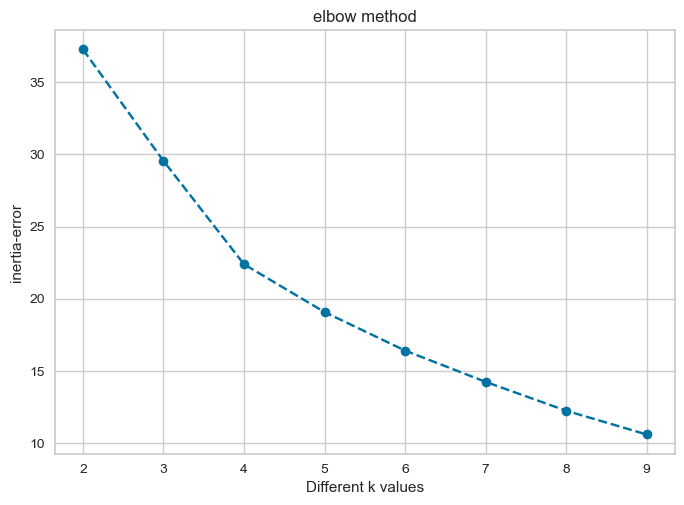

In [133]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

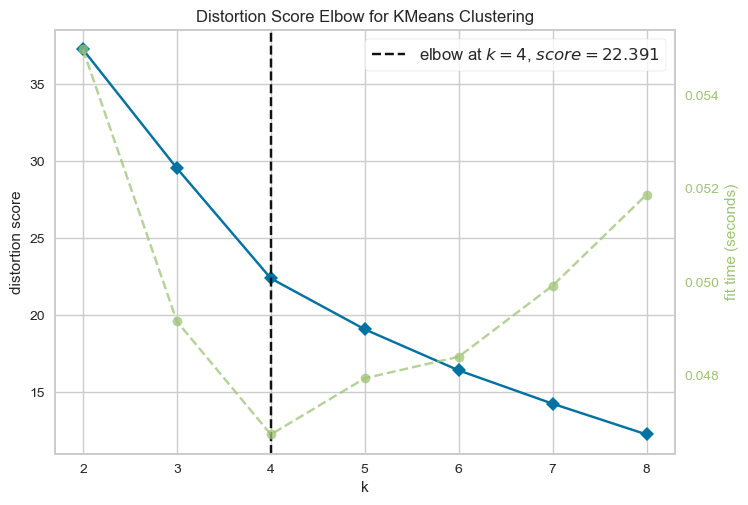

In [134]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();

In [135]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5194624832665107
For n_clusters=3, the silhouette score is 0.4583525581125425
For n_clusters=4, the silhouette score is 0.3641657522339062
For n_clusters=5, the silhouette score is 0.37063226192201254
For n_clusters=6, the silhouette score is 0.37896616979430175
For n_clusters=7, the silhouette score is 0.38436967259321775
For n_clusters=8, the silhouette score is 0.3932791948572234


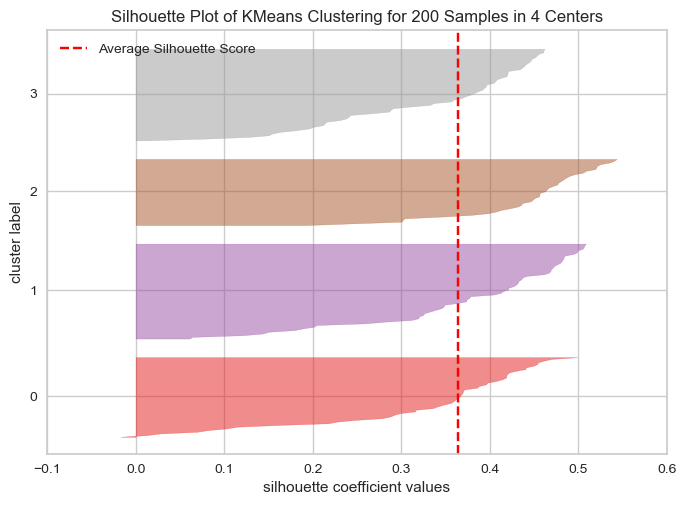

In [136]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, 
                random_state=42)          # n_clusters=3'e karar verdik !
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [137]:
X = pd.DataFrame(X, columns=['gender', 'age', 'annual_income', 'spending_score'])

In [138]:
hopkins(X, X.shape[0])

0.20151019516697546

In [139]:
model = KMeans(n_clusters = 4, random_state=42)
model.fit_predict(X)
clusters = model.labels_
X["predicted_clusters"] = clusters
X

,gender,age,annual_income,spending_score,predicted_clusters
0,0.0,0.019231,0.000000,0.387755,2
1,0.0,0.057692,0.000000,0.816327,2
2,1.0,0.038462,0.008197,0.051020,3
3,1.0,0.096154,0.008197,0.775510,1
4,1.0,0.250000,0.016393,0.397959,1
...,...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918,1
196,1.0,0.519231,0.909836,0.275510,3
197,0.0,0.269231,0.909836,0.744898,2
198,0.0,0.269231,1.000000,0.173469,0


In [140]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3
gender,0.000000,1.000000,0.000000,1.000000
age,0.604567,0.200742,0.197115,0.579021
annual_income,0.388661,0.366120,0.385246,0.359165
spending_score,0.287840,0.680451,0.721173,0.344712


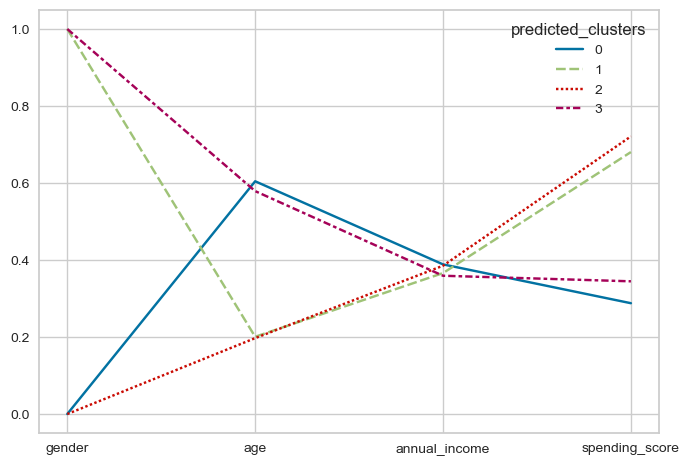

In [141]:
sns.lineplot(data = clus_pred);


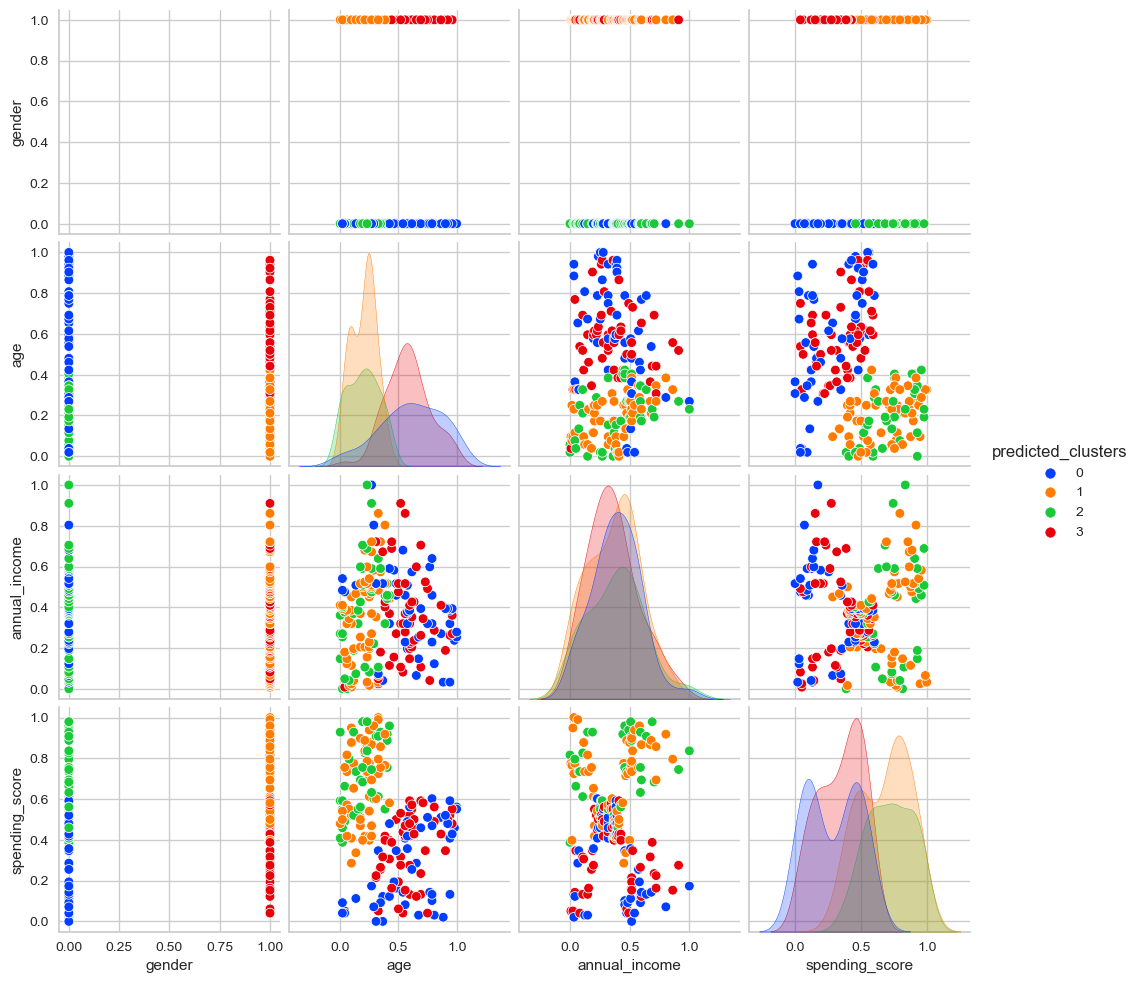

In [142]:
sns.pairplot(data=X, hue='predicted_clusters', palette='bright')

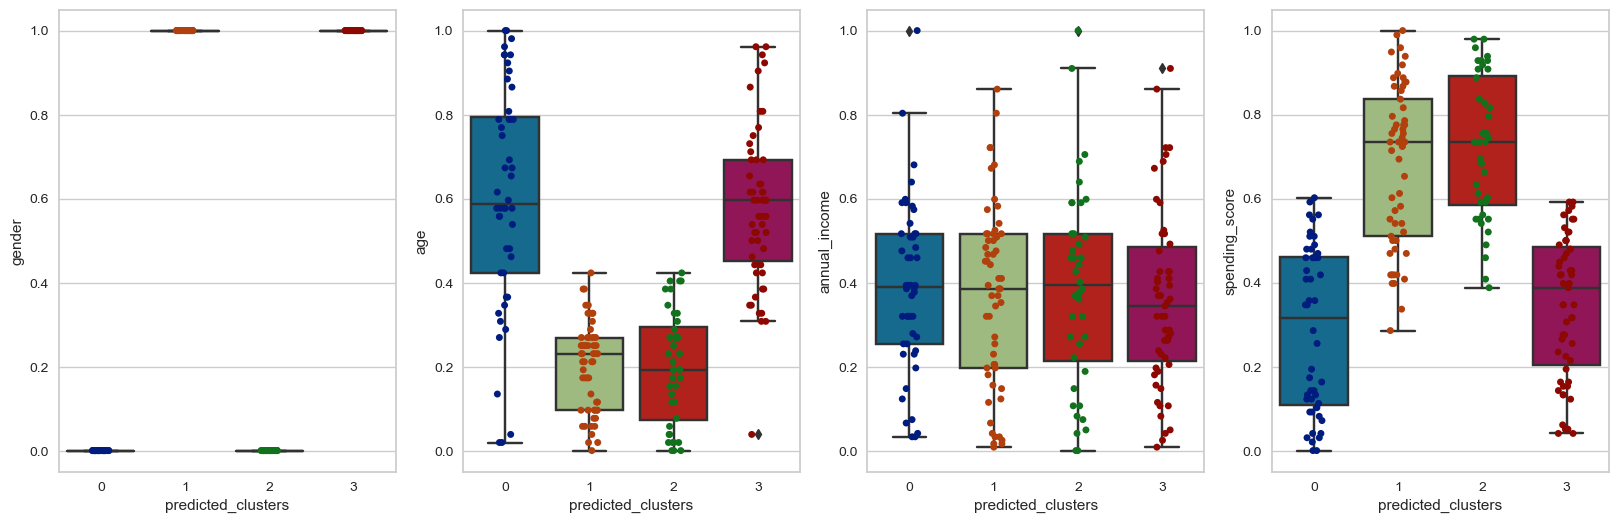

In [143]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "gender", x = "predicted_clusters", data = X)
sns.stripplot(y = "gender", x = "predicted_clusters", data = X, palette="dark")
#striplot ile cluster'larımızın yoğun olduğu ve seyrek olduğu yerleri görebiliyoruz.

plt.subplot(142)
sns.boxplot(y = "age", x = "predicted_clusters", data = X)
sns.stripplot(y = "age", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(143)
sns.boxplot(y = "annual_income", x = "predicted_clusters", data = X)
sns.stripplot(y = "annual_income", x = "predicted_clusters", data = X, palette="dark")

plt.subplot(144)
sns.boxplot(y = "spending_score", x = "predicted_clusters", data = X)
sns.stripplot(y = "spending_score", x = "predicted_clusters", data = X, palette="dark");

In [144]:
X1 = df[df.gender == 0]
X2 = df[df.gender == 1]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___